In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist
(x_train , y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print("X-train  [ Shape %s]sample patch: \n " % str(x_train.shape), x_train[1,15:20,5:10])
# print("Y-train  [ Shape %s]sample patch: \n " % str(y_train.shape), y_train[0])

X-train  [ Shape (60000, 28, 28)]sample patch: 
  [[  0  76 246 252 112]
 [  0  85 252 230  25]
 [  0  85 252 223   0]
 [  0  85 252 145   0]
 [  0  86 253 225   0]]


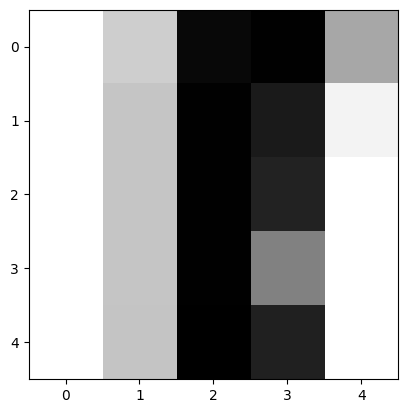

In [5]:
plt.imshow(x_train[1,15:20,5:10], cmap= "Greys")
plt.show()

In [15]:
import tensorflow as tf
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data (normalize)
X_train = X_train.astype('float32') / 255.0#min -max scaler
X_test = X_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

# Define a very simple model with inappropriate settings
model = tf.keras.Sequential([
    # Very few neurons and no hidden layers
    tf.keras.layers.Dense(1000, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(500, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
    # Output layer for classification
])
model.summary()
# Compile the model with an extremely high learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # High learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,290,510 (4.92 MB)

 Trainable params: 1,290,510 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train for very few epochs
history = model.fit(X_train, y_train_oh, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8154 - loss: 0.6229 - val_accuracy: 0.9452 - val_loss: 0.1880
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9607 - loss: 0.1316 - val_accuracy: 0.9659 - val_loss: 0.1204
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9677 - loss: 0.1122 - val_accuracy: 0.9585 - val_loss: 0.1516
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9608 - loss: 0.1385
Test accuracy: 0.9607999920845032


In [17]:
import numpy as np
def get_random_indices(total_images, num_images):
    return np.random.choice(total_images, num_images, replace=False)

# Make predictions
predictions = model.predict(X_test)

# Reshape images to their original dimensions
X_test_images = X_test.reshape(-1, 28, 28)  # Assuming images are 28x28

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_oh, axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


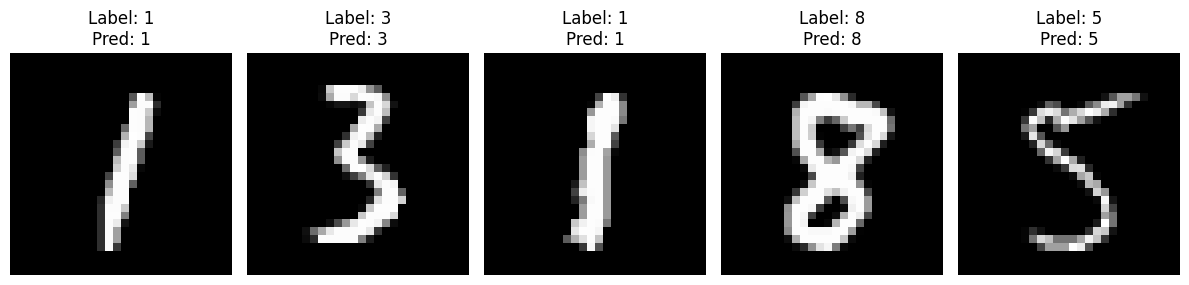

In [18]:

# Randomly select indices
num_images_to_show = 5
random_indices = get_random_indices(len(X_test_images), num_images_to_show)
# Plot and display images with predictions
def plot_images(images, labels, predictions):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')  # Assuming grayscale images
        plt.title(f'Label: {labels[i]}\nPred: {predictions[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display images with predictions
plot_images(X_test_images[random_indices], true_classes[random_indices], predicted_classes[random_indices])